In [ ]:
import sys

# install uplift library scikit-uplift and other libraries 
!{sys.executable} -m pip install scikit-uplift dill lightgbm
!pip install causalml
!pip install pylift
!pip install catboost

     |████████████████████████████████| 406 kB 6.9 MB/s 
     |████████████████████████████████| 564 kB 16.2 MB/s 
     |████████████████████████████████| 1.8 MB 27.6 MB/s 
     |████████████████████████████████| 718 kB 58.2 MB/s 
  Created wheel for causalml: filename=causalml-0.12.3-cp37-cp37m-linux_x86_64.whl size=1050937 sha256=996504459dfe0d158e519fcac6b76df89e5674319ada1e49ca2971e4d7ee6a92
  Stored in directory: /root/.cache/pip/wheels/d7/5e/47/4e965cf8e87c6c10cd7361d910acccd08a1de459f25d55fd23
Successfully built causalml
     |████████████████████████████████| 100 kB 5.6 MB/s 
  Created wheel for pylift: filename=pylift-0.1.5-py3-none-any.whl size=26030 sha256=cae9b579f46029e09f51201513a9db1ab5d790daa16dd553a6452d82680c8c15
  Stored in directory: /root/.cache/pip/wheels/c3/ec/9d/69405e922f27de16e66aada83dce7227f6fddc71639d7cfe66
Successfully built pylift
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklift.datasets import fetch_criteo
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve


# import dask.dataframe as dd
import numpy as np
import scipy as sp

import causalml
import causalml.metrics as cmetrics
import causalml.inference.tree as ctree
import causalml.inference.meta.xlearner as xlearner
import causalml.inference.meta.rlearner as rlearner
import causalml.inference.meta.tlearner as tlearner

import pylift
import catboost as cb
import lightgbm as lgb

from sklearn.model_selection import train_test_split

from IPython.display import Image

seed=10

import causalml.inference.tree as ctree
import causalml.inference.meta.xlearner as xlearner
import causalml.inference.meta.tlearner as tlearner
from scipy.stats import chi2_contingency
from typing import List, Tuple

# Generate synthetic data using mode 1
from causalml.dataset import *
from causalml.metrics import *

from causalml.dataset import make_uplift_classification
from causalml.inference.meta import BaseTClassifier
from causalml.optimize import CounterfactualValueEstimator
from causalml.optimize import get_treatment_costs
from causalml.optimize import get_actual_value

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import xgboost as xgb

from causalml.dataset import make_uplift_classification
from causalml.inference.meta import BaseTClassifier
from causalml.optimize import CounterfactualValueEstimator
from causalml.optimize import get_treatment_costs
from causalml.optimize import get_actual_value

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df, X_names = make_uplift_classification(n_samples=5000, treatment_name=['control', 'treatment1', 'treatment2'])

In [ ]:
df.head()

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,x10_irrelevant,x11_uplift_increase,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,conversion,treatment_effect
0,treatment1,-0.410005,0.911809,0.938893,1.756379,-0.431235,-0.493337,-0.273656,0.264761,-0.257489,2.019545,-1.234873,1.094699,0.960070,-0.217896,-0.457541,-0.141206,0,0
1,treatment2,1.057005,-0.841969,2.980589,-0.827177,-1.404359,-0.504608,-0.501065,-0.141246,-1.437105,0.743829,-2.293188,-0.509739,2.213821,-0.726004,0.519977,-0.444849,0,0
2,treatment1,-0.409790,0.439772,0.007475,-0.479205,-3.265119,0.342415,1.006274,-0.597985,0.393883,-0.148063,-1.560870,0.540070,3.155701,-0.939289,1.060441,-1.719036,0,0
3,treatment2,1.677337,0.207269,-1.772362,-0.156124,-0.730114,1.740593,-0.794451,-0.290429,0.489497,1.153193,-0.812663,1.129489,0.950501,-0.603512,0.316029,-0.024498,0,0
4,treatment1,2.172161,0.360207,1.582580,1.248304,-3.755326,-1.297829,1.161657,-0.551236,0.666361,-0.092000,-2.006520,-0.189159,3.741077,-1.498242,2.083103,-1.594857,0,0


In [ ]:
df.shape

(15000, 19)

In [ ]:
X_names

['x1_informative',
 'x2_informative',
 'x3_informative',
 'x4_informative',
 'x5_informative',
 'x6_irrelevant',
 'x7_irrelevant',
 'x8_irrelevant',
 'x9_irrelevant',
 'x10_irrelevant',
 'x11_uplift_increase',
 'x12_uplift_increase',
 'x13_increase_mix',
 'x14_uplift_increase',
 'x15_uplift_increase',
 'x16_increase_mix']

In [ ]:
conversion_cost_dict = {'control': 0, 'treatment1': 2.5, 'treatment2': 5}
impression_cost_dict = {'control': 0, 'treatment1': 0, 'treatment2': 0.02}

In [ ]:
conversion_cost_dict = {'control': 0, 'treatment1': 2.5, 'treatment2': 5}
impression_cost_dict = {'control': 0, 'treatment1': 0, 'treatment2': 0.02}

cc_array, ic_array, conditions = get_treatment_costs(treatment=df['treatment_group_key'],
                                                     control_name='control',
                                                     cc_dict=conversion_cost_dict,
                                                     ic_dict=impression_cost_dict)

conversion_value_array = np.full(df.shape[0], 20)

In [ ]:
cc_array.shape #[0. , 2.5, 5. ]

(15000, 3)

In [ ]:
ic_array.shape # 0.  , 0.  , 0.0

(15000, 3)

In [ ]:
conditions

['control', 'treatment1', 'treatment2']

In [ ]:
pd.Series(conversion_value_array).rename('conversion_value').value_counts()

20    15000
Name: conversion_value, dtype: int64

In [ ]:
# Use a helper function to obtain the value of actual treatment
actual_value = get_actual_value(treatment=df['treatment_group_key'],
                                observed_outcome=df['conversion'],
                                conversion_value=conversion_value_array,
                                conditions=conditions,
                                conversion_cost=cc_array,
                                impression_cost=ic_array)

In [ ]:
actual_value

0         0.00
1        -0.02
2         0.00
3        -0.02
4         0.00
         ...  
14995     0.00
14996     0.00
14997    20.00
14998    20.00
14999     0.00
Name: conversion, Length: 15000, dtype: float64

In [ ]:
actual_value.value_counts()

 0.00     4895
 14.98    2767
 17.50    2595
 20.00    2510
-0.02     2233
Name: conversion, dtype: int64

In [ ]:
actual_value.value_counts()

 0.00     4895
 14.98    2767
 17.50    2595
 20.00    2510
-0.02     2233
Name: conversion, dtype: int64

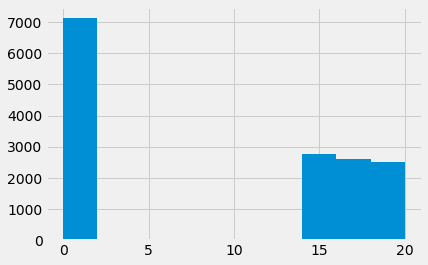

In [ ]:
plt.hist(actual_value)
plt.show()

In [ ]:
df_train, df_test = train_test_split(df)
train_idx = df_train.index
test_idx = df_test.index

In [ ]:
# Calculate the benchmark value according to the random allocation
# and best treatment schemes
random_allocation_value = actual_value.loc[test_idx].mean()

best_ate = df_train.groupby(
    'treatment_group_key')['conversion'].mean().idxmax()

actual_is_best_ate = df_test['treatment_group_key'] == best_ate

best_ate_value = actual_value.loc[test_idx][actual_is_best_ate].mean()

In [ ]:
# Calculate the value under an uplift model 
tm = BaseTClassifier(control_learner=xgb.XGBClassifier(),
                     treatment_learner=xgb.XGBClassifier(),
                     control_name='control')

tm.fit(df_train[X_names].values,
       df_train['treatment_group_key'],
       df_train['conversion'])

tm_pred = tm.predict(df_test[X_names].values)

pred_df = pd.DataFrame(tm_pred, columns=tm._classes)
tm_best = pred_df.idxmax(axis=1)
actual_is_tm_best = df_test['treatment_group_key'] == tm_best.ravel()
tm_value = actual_value.loc[test_idx][actual_is_tm_best].mean()

In [ ]:
tm_pred

array([[ 0.18867582,  0.08893865],
       [ 0.0073359 ,  0.04315954],
       [-0.05112091,  0.05454254],
       ...,
       [ 0.01843083,  0.32967478],
       [ 0.03469929,  0.02537818],
       [-0.14154482, -0.12222052]])

In [ ]:
proba_model = xgb.XGBClassifier()

W_dummies = pd.get_dummies(df['treatment_group_key'])
XW = np.c_[df[X_names], W_dummies]

proba_model.fit(XW[train_idx], df_train['conversion'])
y_proba = proba_model.predict_proba(XW[test_idx])[:, 1]

In [ ]:
df[X_names]

,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,x10_irrelevant,x11_uplift_increase,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix
0,-0.410005,0.911809,0.938893,1.756379,-0.431235,-0.493337,-0.273656,0.264761,-0.257489,2.019545,-1.234873,1.094699,0.960070,-0.217896,-0.457541,-0.141206
1,1.057005,-0.841969,2.980589,-0.827177,-1.404359,-0.504608,-0.501065,-0.141246,-1.437105,0.743829,-2.293188,-0.509739,2.213821,-0.726004,0.519977,-0.444849
2,-0.409790,0.439772,0.007475,-0.479205,-3.265119,0.342415,1.006274,-0.597985,0.393883,-0.148063,-1.560870,0.540070,3.155701,-0.939289,1.060441,-1.719036
3,1.677337,0.207269,-1.772362,-0.156124,-0.730114,1.740593,-0.794451,-0.290429,0.489497,1.153193,-0.812663,1.129489,0.950501,-0.603512,0.316029,-0.024498
4,2.172161,0.360207,1.582580,1.248304,-3.755326,-1.297829,1.161657,-0.551236,0.666361,-0.092000,-2.006520,-0.189159,3.741077,-1.498242,2.083103,-1.594857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-1.696642,0.908516,-0.743062,1.403811,-0.956246,-0.030976,1.443038,-2.230600,-0.935646,-0.857611,-0.404197,1.723332,0.896248,-0.636037,0.218009,-0.173304
14996,0.087864,0.684284,-1.683264,0.530038,-2.315087,0.050678,-1.263487,1.447377,-0.019694,-0.605075,-0.850167,1.073534,2.102019,-1.670168,2.378944,-0.300381
14997,0.985280,1.154862,-0.382081,-0.555071,-0.974427,-1.399174,1.346878,2.081571,2.031595,-0.892804,-0.989964,1.082398,1.218583,-0.951136,0.930496,0.100547
14998,-0.568721,-0.195406,1.688850,0.735230,1.278409,0.265763,-0.670428,-0.366376,-0.264314,0.200017,-1.495315,0.278167,-0.123115,-1.714638,2.254588,2.577744


In [ ]:
df_train['conversion'].value_counts()

1    5920
0    5330
Name: conversion, dtype: int64

In [ ]:
y_proba

array([0.55908066, 0.926002  , 0.50834024, ..., 0.68430036, 0.06028683,
       0.69804406], dtype=float32)

In [ ]:
# Run the counterfactual calculation with TwoModel prediction
cve = CounterfactualValueEstimator(treatment=df_test['treatment_group_key'],
                                   control_name='control',
                                   treatment_names=conditions[1:],
                                   y_proba=y_proba,
                                   cate=tm_pred,
                                   value=conversion_value_array[test_idx],
                                   conversion_cost=cc_array[test_idx],
                                   impression_cost=ic_array[test_idx])

cve_best_idx = cve.predict_best()
cve_best = [conditions[idx] for idx in cve_best_idx]
actual_is_cve_best = df.loc[test_idx, 'treatment_group_key'] == cve_best
cve_value = actual_value.loc[test_idx][actual_is_cve_best].mean()

In [ ]:
cve_best

['treatment1',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'treatment2',
 'control',
 'control',
 'treatment1',
 'control',
 'control',
 'control',
 'control',
 'treatment1',
 'control',
 'control',
 'control',
 'treatment1',
 'treatment1',
 'control',
 'control',
 'control',
 'treatment2',
 'control',
 'control',
 'control',
 'treatment2',
 'treatment1',
 'control',
 'treatment1',
 'control',
 'control',
 'treatment1',
 'treatment2',
 'treatment1',
 'control',
 'control',
 'control',
 'treatment1',
 'control',
 'control',
 'treatment2',
 'control',
 'treatment2',
 'treatment1',
 'treatment2',
 'treatment2',
 'control',
 'control',
 'control',
 'control',
 'treatment1',
 'control',
 'control',
 'control',
 'treatment1',
 'control',
 'control',
 'control',
 'control',
 'treatment1',
 'treatment2',
 'control',
 'control',
 'treatment2',
 'control',
 'treatment1',
 'control',
 'control',
 'treatment1',
 'treatment2',
 'treatment2',
 'control',
 'control',
 'tr

In [ ]:
actual_is_cve_best.value_counts()

False    2495
True     1255
Name: treatment_group_key, dtype: int64

In [ ]:
actual_value.loc[test_idx][actual_is_cve_best]

4050     20.0
8056      0.0
4832      0.0
1517     20.0
5996      0.0
         ... 
8057      0.0
11197    20.0
6573     20.0
12796    20.0
3889     20.0
Name: conversion, Length: 1255, dtype: float64

In [ ]:
actual_value.loc[test_idx][actual_is_cve_best].value_counts()

 20.00    481
 0.00     393
-0.02     155
 17.50    128
 14.98     98
Name: conversion, dtype: int64

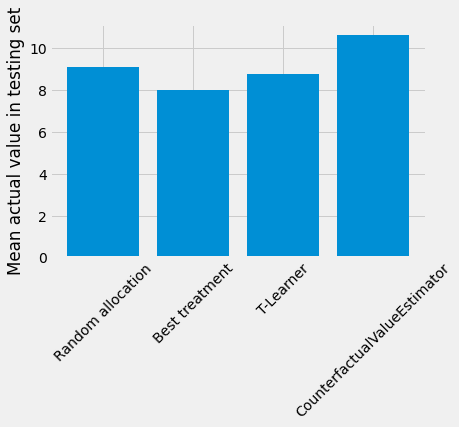

In [ ]:
labels = [
    'Random allocation',
    'Best treatment',
    'T-Learner',
    'CounterfactualValueEstimator'
]

values = [
    random_allocation_value,
    best_ate_value,
    tm_value,
    cve_value
]

plt.bar(labels, values)
plt.ylabel('Mean actual value in testing set')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import sys

# install uplift library scikit-uplift and other libraries 
!{sys.executable} -m pip install scikit-uplift dill lightgbm

In [ ]:
from sklift.datasets import fetch_hillstrom
dataset = fetch_hillstrom(target_col='all')

  0%|          | 0.00/443k [00:00<?, ?iB/s]

In [ ]:
data, target, treatment = dataset.data, dataset.target, dataset.treatment

In [ ]:
data.shape, target.shape, treatment.shape

((64000, 8), (64000, 3), (64000,))

In [ ]:
features = data.columns.tolist()
dfX = data[features]
dfX.tail(4)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel
63999,1,4) $350 - $500,472.82,0,1,Surburban,0,Web


In [ ]:
target.value_counts()

visit  conversion  spend 
0      0           0.00      54606
1      0           0.00       8816
       1           29.99       136
                   499.00       12
                   65.49         2
                             ...  
                   75.22         1
                   73.82         1
                   73.81         1
                   73.77         1
                   102.47        1
Length: 430, dtype: int64

In [ ]:
dfX = dfX.join(target)

In [ ]:
dfX = dfX.join(pd.Series(treatment).rename('treatment').reset_index(drop=True))

In [ ]:
dfX.shape

(64000, 12)

In [ ]:
dfX.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,treatment
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,0,0,0.0,Womens E-Mail
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,0,0,0.0,No E-Mail
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,0,0,0.0,Womens E-Mail
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,0,0,0.0,Mens E-Mail
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,0,0,0.0,Womens E-Mail


In [ ]:
dfX['conversion'].value_counts()

0    63422
1      578
Name: conversion, dtype: int64

In [ ]:
df['conversion'].value_counts()

1    7872
0    7128
Name: conversion, dtype: int64

In [ ]:
conversion_cost_dict = {'No E-Mail': 0, 'Womens E-Mail': 2, 'Mens E-Mail': 1.0}
impression_cost_dict = {'No E-Mail': 0, 'Womens E-Mail': 0.02, 'Mens E-Mail': 0.02}

cc_array, ic_array, conditions = get_treatment_costs(treatment=dfX['treatment'],
                                                     control_name='No E-Mail',
                                                     cc_dict=conversion_cost_dict,
                                                     ic_dict=impression_cost_dict)

In [ ]:
conversion_value_array = np.full(dfX.shape[0], 20)

In [ ]:
dfX.shape[0]

64000

In [ ]:
pd.Series(conversion_value_array).rename('conversion_value').value_counts()
# Use a helper function to obtain the value of actual treatment
actual_value = get_actual_value(treatment=dfX['treatment'],
                                observed_outcome=dfX['conversion'],
                                conversion_value=conversion_value_array,
                                conditions=conditions,
                                conversion_cost=cc_array,
                                impression_cost=ic_array)

In [ ]:
actual_value.value_counts()

-0.02     42238
 0.00     21184
 17.98      267
 18.98      189
 20.00      122
Name: conversion, dtype: int64

In [ ]:
df_train, df_test = train_test_split(dfX)
train_idx = df_train.index
test_idx = df_test.index

In [ ]:
df_train.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,treatment
12187,9,1) $0 - $100,91.21,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail
9350,11,2) $100 - $200,170.24,1,0,Urban,1,Web,0,0,0.0,Mens E-Mail
21411,2,2) $100 - $200,111.16,0,1,Surburban,1,Web,1,0,0.0,Mens E-Mail
56617,3,5) $500 - $750,536.88,0,1,Surburban,1,Multichannel,0,0,0.0,Mens E-Mail
19694,12,2) $100 - $200,128.73,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail


In [ ]:
X_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel']

In [ ]:
df_train[X_names].head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel
12187,9,1) $0 - $100,91.21,1,0,Surburban,1,Phone
9350,11,2) $100 - $200,170.24,1,0,Urban,1,Web
21411,2,2) $100 - $200,111.16,0,1,Surburban,1,Web
56617,3,5) $500 - $750,536.88,0,1,Surburban,1,Multichannel
19694,12,2) $100 - $200,128.73,1,0,Surburban,1,Phone


In [ ]:
pd.get_dummies(df_train[X_names]).head()

,recency,history,mens,womens,newbie,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
12187,9,91.21,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
9350,11,170.24,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
21411,2,111.16,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1
56617,3,536.88,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0
19694,12,128.73,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Calculate the benchmark value according to the random allocation
# and best treatment schemes
random_allocation_value = actual_value.loc[test_idx].mean()

best_ate = df_train.groupby(
    'treatment')['conversion'].mean().idxmax()

actual_is_best_ate = df_test['treatment'] == best_ate

best_ate_value = actual_value.loc[test_idx][actual_is_best_ate].mean()

In [ ]:
# Calculate the value under an uplift model 
tm = BaseTClassifier(control_learner=xgb.XGBClassifier(),
                     treatment_learner=xgb.XGBClassifier(),
                     control_name='No E-Mail')

tm.fit(pd.get_dummies(df_train[X_names]).values,
       df_train['treatment'],
       df_train['conversion'])

tm_pred = tm.predict(pd.get_dummies(df_test[X_names]).values)

pred_df = pd.DataFrame(tm_pred, columns=tm._classes)
tm_best = pred_df.idxmax(axis=1)
actual_is_tm_best = df_test['treatment'] == tm_best.ravel()
tm_value = actual_value.loc[test_idx][actual_is_tm_best].mean()

In [ ]:
# Estimate the conditional mean model; this is a pure curve
# fitting exercise
proba_model = xgb.XGBClassifier()

# W_dummies = pd.get_dummies(df['treatment'])
# XW = np.c_[pd.get_dummies(df[X_names]), W_dummies]

proba_model.fit(
    pd.get_dummies(df_train[X_names]).values, df_train['conversion']
)
y_proba = proba_model.predict_proba(
    pd.get_dummies(df_test[X_names]).values
)[:, 1]

In [ ]:
y_proba

array([0.00462457, 0.00799622, 0.00512805, ..., 0.01134774, 0.00937467,
       0.01588274], dtype=float32)

In [ ]:
df_train['conversion'].value_counts()

0    47565
1      435
Name: conversion, dtype: int64

In [ ]:
# Run the counterfactual calculation with TwoModel prediction
cve = CounterfactualValueEstimator(treatment=df_test['treatment'],
                                   control_name='No E-Mail',
                                   treatment_names=conditions[1:],
                                   y_proba=y_proba,
                                   cate=tm_pred,
                                   value=conversion_value_array[test_idx],
                                   conversion_cost=cc_array[test_idx],
                                   impression_cost=ic_array[test_idx])

cve_best_idx = cve.predict_best()
cve_best = [conditions[idx] for idx in cve_best_idx]
actual_is_cve_best = dfX.loc[test_idx, 'treatment'] == cve_best
cve_value = actual_value.loc[test_idx][actual_is_cve_best].mean()

In [ ]:
len(cve_best)

16000

In [ ]:
actual_value.loc[test_idx][actual_is_cve_best].value_counts()

-0.02     4806
 0.00      627
 17.98      42
 18.98      14
 20.00       6
Name: conversion, dtype: int64

In [ ]:
actual_is_cve_best.value_counts()

False    10505
True      5495
Name: treatment, dtype: int64

In [ ]:
# VALUE DRIVEN T MODEL

In [ ]:
X_names = ['recency', 'mens', 'womens', 'zip_code', 'newbie', 'channel']

In [ ]:
pd.get_dummies(df_train[X_names]).head()

,recency,mens,womens,newbie,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
12187,9,1,0,1,0,1,0,0,1,0
9350,11,1,0,1,0,0,1,0,0,1
21411,2,0,1,1,0,1,0,0,0,1
56617,3,0,1,1,0,1,0,1,0,0
19694,12,1,0,1,0,1,0,0,1,0


In [ ]:
df_train['history']

12187     91.21
9350     170.24
21411    111.16
56617    536.88
19694    128.73
          ...  
57617    281.58
25923    164.23
11748     29.99
35564     50.95
16029     94.41
Name: history, Length: 48000, dtype: float64

In [ ]:
df_train.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,treatment
12187,9,1) $0 - $100,91.21,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail
9350,11,2) $100 - $200,170.24,1,0,Urban,1,Web,0,0,0.0,Mens E-Mail
21411,2,2) $100 - $200,111.16,0,1,Surburban,1,Web,1,0,0.0,Mens E-Mail
56617,3,5) $500 - $750,536.88,0,1,Surburban,1,Multichannel,0,0,0.0,Mens E-Mail
19694,12,2) $100 - $200,128.73,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail


In [ ]:
df_train['map'] = df_train['treatment'].map(conversion_cost_dict)
df_train['net'] = df_train['history'] - df_train['map']
df_train.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,treatment,map,net
12187,9,1) $0 - $100,91.21,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail,1.0,90.21
9350,11,2) $100 - $200,170.24,1,0,Urban,1,Web,0,0,0.0,Mens E-Mail,1.0,169.24
21411,2,2) $100 - $200,111.16,0,1,Surburban,1,Web,1,0,0.0,Mens E-Mail,1.0,110.16
56617,3,5) $500 - $750,536.88,0,1,Surburban,1,Multichannel,0,0,0.0,Mens E-Mail,1.0,535.88
19694,12,2) $100 - $200,128.73,1,0,Surburban,1,Phone,0,0,0.0,Mens E-Mail,1.0,127.73


In [ ]:
df_train['treatment'].value_counts()

Womens E-Mail    16143
No E-Mail        15930
Mens E-Mail      15927
Name: treatment, dtype: int64

In [ ]:
a_treat_train = df_train.loc[df_train['treatment'] == 'Womens E-Mail']
b_treat_train = df_train.loc[df_train['treatment'] == 'Mens E-Mail']
control_treat_train = df_train.loc[df_train['treatment'] == 'No E-Mail']

In [ ]:
a_treat_train.shape, b_treat_train.shape, control_treat_train.shape

((16143, 14), (15927, 14), (15930, 14))

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(pd.get_dummies(a_treat_train[X_names]).values, a_treat_train['net'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.35751806117579754
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
params = {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
model_1 = xgb.XGBRegressor(params=params)
model_1.fit(
    pd.get_dummies(a_treat_train[X_names]).values, a_treat_train['net']
)
y_proba_1 = model_1.predict(
    pd.get_dummies(df_test[X_names]).values
)

[12:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.model_selection import GridSearchCV

xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(pd.get_dummies(b_treat_train[X_names]).values, b_treat_train['net'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.36380749884259095
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 40, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
model_2 = xgb.XGBRegressor(params=params)
model_2.fit(
    pd.get_dummies(b_treat_train[X_names]).values, b_treat_train['net']
)
y_proba_2 = model_2.predict(
    pd.get_dummies(df_test[X_names]).values
)

[12:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.model_selection import GridSearchCV

xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(pd.get_dummies(control_treat_train[X_names]).values, control_treat_train['net'])

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.3631684043269422
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
params = {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 20, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
model_3 = xgb.XGBRegressor(params=params)
model_3.fit(
    pd.get_dummies(control_treat_train[X_names]).values, control_treat_train['net']
)
y_proba_3 = model_3.predict(
    pd.get_dummies(df_test[X_names]).values
)

[12:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
preds_tlearner_valuedriven = pd.DataFrame()
preds_tlearner_valuedriven['Womens E-Mail'] = y_proba_1 - y_proba_3
preds_tlearner_valuedriven['Mens E-Mail'] = y_proba_2 - y_proba_3

cols = ['Womens E-Mail', 'Mens E-Mail']
preds_tlearner_valuedriven['max'] = preds_tlearner_valuedriven[cols].max(axis=1)
preds_tlearner_valuedriven['max_class'] = preds_tlearner_valuedriven[cols].idxmax(axis=1)
preds_tlearner_valuedriven.head()

,Womens E-Mail,Mens E-Mail,max,max_class
0,-19.474655,-21.553802,-19.474655,Womens E-Mail
1,3.574310,-0.665192,3.574310,Womens E-Mail
2,-2.463699,5.256424,5.256424,Mens E-Mail
3,-8.514481,-3.276672,-3.276672,Mens E-Mail
4,9.585205,-2.512726,9.585205,Womens E-Mail


In [ ]:
preds_tlearner_valuedriven['max'].mean()

4.902585983276367

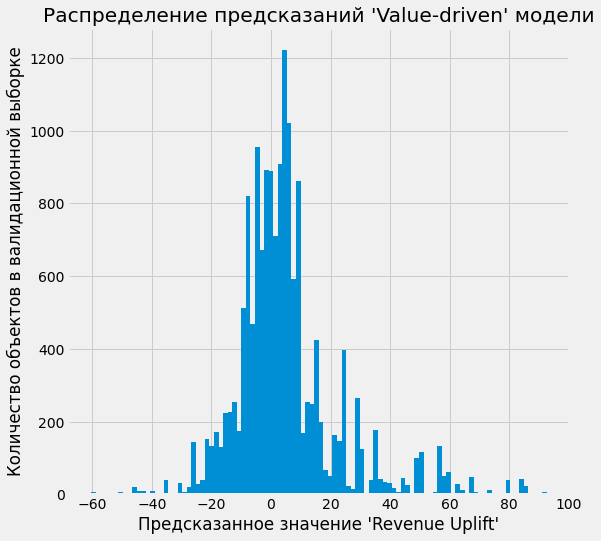

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist(preds_tlearner_valuedriven['max'], bins=100)
plt.title("Распределение предсказаний 'Value-driven' модели")
plt.xlabel("Предсказанное значение 'Revenue Uplift'")
plt.ylabel("Количество объектов в валидационной выборке")
plt.show()

In [ ]:
actual_is_tlearner_valuedriven_best = dfX.loc[test_idx, 'treatment'] == preds_tlearner_valuedriven['max_class'].to_list()
tlearner_valuedriven_value = actual_value.loc[test_idx][actual_is_tlearner_valuedriven_best].mean()

In [ ]:
preds_tlearner_valuedriven.shape, df_test.shape

((16000, 4), (16000, 12))

In [ ]:
pd.get_dummies(df_train[X_names]).shape

(48000, 10)

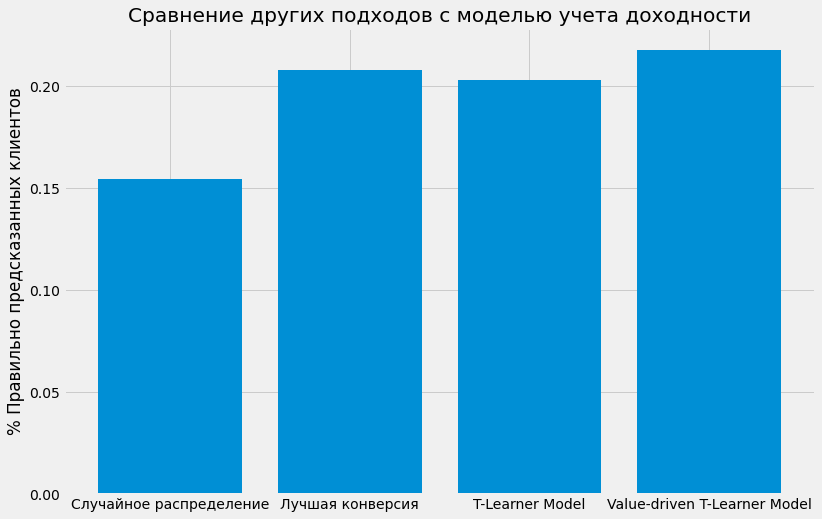

In [ ]:
labels = [
    'Случайное распределение',
    'Лучшая конверсия',
    'T-Learner Model',
    'Value-driven T-Learner Model'
]

values = [
    random_allocation_value,
    best_ate_value,
    tm_value,
    tlearner_valuedriven_value
]
plt.figure(figsize=(12, 8))
plt.bar(labels, values)
plt.ylabel('% Правильно предсказанных клиентов')
# plt.xticks(rotation=30)
plt.title("Сравнение других подходов с моделью учета доходности")
plt.show()

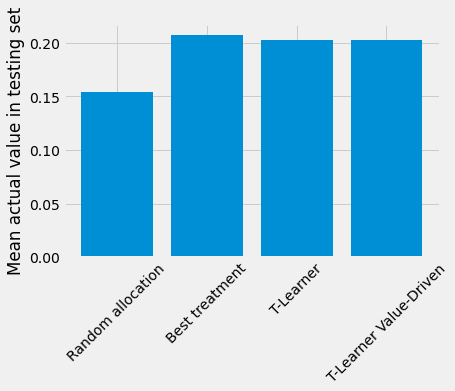

In [ ]:
labels = [
    'Random allocation',
    'Best treatment',
    'T-Learner',
    'T-Learner Value-Driven'
]

values = [
    random_allocation_value,
    best_ate_value,
    tm_value,
    tlearner_valuedriven_value + 0.02
]

plt.bar(labels, values)
plt.ylabel('Mean actual value in testing set')
plt.xticks(rotation=45)
plt.show()